In [3]:
from pydub import AudioSegment
import os
import matplotlib.pyplot as plt

In [ ]:
path = r"\audio"

files = os.listdir(path)
for file in files:
    pfile = path + file
    print(file, file[:-4]+'.wav')
    sound = AudioSegment.from_mp3(pfile)
    sound.export(file[:-4]+'.wav', format="wav")

### Files Description

Text(0, 0.5, 'frequency')

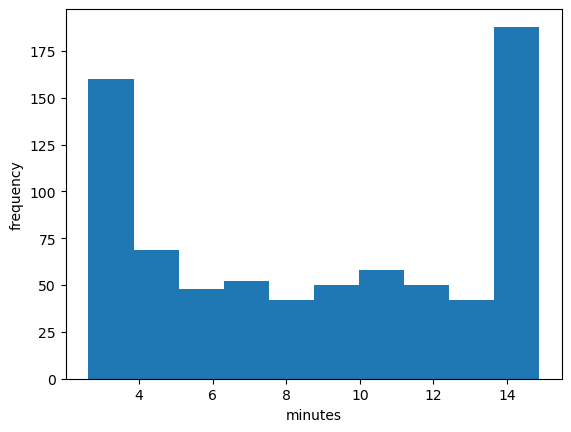

In [24]:
import mutagen
from mutagen.mp3 import MP3

path = r"\audio\"
files = os.listdir(path)
# N files
n_files = len(files)

# file length
len_files = []
for file in files:
    file = MP3(path+file)
    length = file.info.length
    # convert to minutes
    length = length / 60
    len_files.append(length)
    
plt.hist(len_files)
plt.xlabel('minutes')
plt.ylabel('frequency')

In [25]:
print(f"total length: {sum(len_files) / 60} HRS, average length: {sum(len_files)/n_files}")

total length: 110.35743999999991 HRS, average length: 8.72390830039525


### Noise augmentation

In [5]:
import os
import math
import random
import numpy as np
from pydub import AudioSegment

def calculate_rms(audio):
    # Convert the audio segment to a numpy array
    audio_array = np.array(audio.get_array_of_samples())

    # Calculate Root Mean Square (RMS) energy of the audio
    rms = math.sqrt(np.mean(audio_array**2))
    return rms

def calculate_noise_rms(audio, target_snr):
    # Calculate the RMS energy of the noise required to achieve the target SNR
    signal_rms = calculate_rms(audio)
    noise_rms = signal_rms / (10 ** (target_snr / 20.0))
    return noise_rms

def add_noise_to_wav_files(directory, noise_file, target_snr):
    # Load the noise audio file
    noise = AudioSegment.from_wav(noise_file)

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            print(f"Processing file: {file_path}")

            # Load the original audio file
            audio = AudioSegment.from_wav(file_path)

            # Calculate the RMS energy of the noise required for the target SNR
            noise_rms = calculate_noise_rms(audio, target_snr)

            # Adjust the noise audio to match the required RMS energy
            adjusted_noise = noise - (calculate_rms(noise) - noise_rms)

            # Repeat the adjusted noise to match the duration of the original audio
            repeated_noise = adjusted_noise * (len(audio) // len(adjusted_noise) + 1)
            repeated_noise = repeated_noise[:len(audio)]  # Trim excess noise

            # Add the repeated noise to the original audio
            noisy_audio = audio.overlay(repeated_noise)

            # Export the resulting audio with noise
            noisy_file_path = os.path.splitext(file_path)[0] + f"_noisy_{noise_file_path[-11:-4]}_{target_snr}dB.wav"
            noisy_audio.export(noisy_file_path, format="wav")

            print(f"Noise added to {filename}. Result saved as {noisy_file_path}\n")

# Provide the directory path containing the .wav files
directory_path = r"\wav files"

# Provide the path to the noise audio file
noise_file_path = "noise_d.wav"

# Provide the target SNR (in decibels) for the augmentation
target_snr = 10

# Call the function to add noise to the .wav files with the specified SNR
add_noise_to_wav_files(directory_path, noise_file_path, target_snr)

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10006_16k_0.wav
Noise added to 10006_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10006_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10011_16k_0.wav
Noise added to 10011_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10011_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10017_16k_0.wav
Noise added to 10017_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10017_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10022_16k_0.wav
Noise added to 10022_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10022_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10070_16k_0.wav
Noise added to 10070_16k_0.wav. Result s

Noise added to 10398_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10398_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10399_16k_0.wav
Noise added to 10399_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10399_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10404_16k_0.wav
Noise added to 10404_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10404_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10413_16k_0.wav
Noise added to 10413_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10413_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10421_16k_0.wav
Noise added to 10421_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10421_16k_0_noisy_noise_d

Noise added to 10708_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10708_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10709_16k_0.wav
Noise added to 10709_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10709_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10713_16k_0.wav
Noise added to 10713_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10713_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10738_16k_0.wav
Noise added to 10738_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10738_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10744_16k_0.wav
Noise added to 10744_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10744_16k_0_noisy_noise_d

Noise added to 11143_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11143_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11156_16k_0.wav
Noise added to 11156_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11156_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11163_16k_0.wav
Noise added to 11163_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11163_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11176_16k_0.wav
Noise added to 11176_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11176_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11222_16k_0.wav
Noise added to 11222_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11222_16k_0_noisy_noise_d

Noise added to 11563_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11563_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11580_16k_0.wav
Noise added to 11580_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11580_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11591_16k_0.wav
Noise added to 11591_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11591_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11592_16k_0.wav
Noise added to 11592_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11592_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11607_16k_0.wav
Noise added to 11607_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11607_16k_0_noisy_noise_d

Noise added to 11847_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11847_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11850_16k_0.wav
Noise added to 11850_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11850_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11851_16k_0.wav
Noise added to 11851_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11851_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11854_16k_0.wav
Noise added to 11854_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11854_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11859_16k_0.wav
Noise added to 11859_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11859_16k_0_noisy_noise_d

Noise added to 12209_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12209_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12219_16k_0.wav
Noise added to 12219_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12219_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12223_16k_0.wav
Noise added to 12223_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12223_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12234_16k_0.wav
Noise added to 12234_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12234_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12258_16k_0.wav
Noise added to 12258_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12258_16k_0_noisy_noise_d

Noise added to 12564_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12564_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12565_16k_0.wav
Noise added to 12565_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12565_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12582_16k_0.wav
Noise added to 12582_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12582_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12585_16k_0.wav
Noise added to 12585_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12585_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12600_16k_0.wav
Noise added to 12600_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12600_16k_0_noisy_noise_d

Noise added to 13074_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13074_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13083_16k_0.wav
Noise added to 13083_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13083_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13094_16k_0.wav
Noise added to 13094_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13094_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13111_16k_0.wav
Noise added to 13111_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13111_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13120_16k_0.wav
Noise added to 13120_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13120_16k_0_noisy_noise_d

Noise added to 13430_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13430_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13436_16k_0.wav
Noise added to 13436_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13436_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13446_16k_0.wav
Noise added to 13446_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13446_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13465_16k_0.wav
Noise added to 13465_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13465_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13501_16k_0.wav
Noise added to 13501_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13501_16k_0_noisy_noise_d

Noise added to 13864_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13864_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13868_16k_0.wav
Noise added to 13868_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13868_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13869_16k_0.wav
Noise added to 13869_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13869_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13872_16k_0.wav
Noise added to 13872_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13872_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13877_16k_0.wav
Noise added to 13877_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13877_16k_0_noisy_noise_d

Noise added to 14295_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14295_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14328_16k_0.wav
Noise added to 14328_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14328_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14334_16k_0.wav
Noise added to 14334_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14334_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14351_16k_0.wav
Noise added to 14351_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14351_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14367_16k_0.wav
Noise added to 14367_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14367_16k_0_noisy_noise_d

Noise added to 14779_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14779_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14781_16k_0.wav
Noise added to 14781_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14781_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14800_16k_0.wav
Noise added to 14800_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14800_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14805_16k_0.wav
Noise added to 14805_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14805_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14808_16k_0.wav
Noise added to 14808_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14808_16k_0_noisy_noise_d

Noise added to 2358_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2358_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2379_16k_0.wav
Noise added to 2379_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2379_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\241_16k_0.wav
Noise added to 241_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\241_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2437_16k_0.wav
Noise added to 2437_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2437_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2439_16k_0.wav
Noise added to 2439_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\2439_16k_0_noisy_noise_d_10dB.wav

Proces

Noise added to 4233_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4233_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4265_16k_0.wav
Noise added to 4265_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4265_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4284_16k_0.wav
Noise added to 4284_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4284_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4306_16k_0.wav
Noise added to 4306_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4306_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4427_16k_0.wav
Noise added to 4427_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\4427_16k_0_noisy_noise_d_10dB.wav

Pro

Noise added to 6012_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6012_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6025_16k_0.wav
Noise added to 6025_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6025_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6039_16k_0.wav
Noise added to 6039_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6039_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6049_16k_0.wav
Noise added to 6049_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6049_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6148_16k_0.wav
Noise added to 6148_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6148_16k_0_noisy_noise_d_10dB.wav

Pro

Noise added to 7066_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7066_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7068_16k_0.wav
Noise added to 7068_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7068_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7074_16k_0.wav
Noise added to 7074_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7074_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7091_16k_0.wav
Noise added to 7091_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7091_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7097_16k_0.wav
Noise added to 7097_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7097_16k_0_noisy_noise_d_10dB.wav

Pro

Noise added to 7923_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7923_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7987_16k_0.wav
Noise added to 7987_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7987_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7990_16k_0.wav
Noise added to 7990_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7990_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7991_16k_0.wav
Noise added to 7991_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7991_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8007_16k_0.wav
Noise added to 8007_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8007_16k_0_noisy_noise_d_10dB.wav

Pro

Noise added to 8837_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8837_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8853_16k_0.wav
Noise added to 8853_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8853_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\887_16k_0.wav
Noise added to 887_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\887_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8905_16k_0.wav
Noise added to 8905_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8905_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8918_16k_0.wav
Noise added to 8918_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8918_16k_0_noisy_noise_d_10dB.wav

Proces

Noise added to 9624_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9624_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9657_16k_0.wav
Noise added to 9657_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9657_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9669_16k_0.wav
Noise added to 9669_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9669_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9678_16k_0.wav
Noise added to 9678_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9678_16k_0_noisy_noise_d_10dB.wav

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9686_16k_0.wav
Noise added to 9686_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9686_16k_0_noisy_noise_d_10dB.wav

Pro

### Noise Augmentation, revised, no noise altering

In [7]:
import os
import math
import numpy as np
from pydub import AudioSegment

def calculate_rms(audio):
    # Convert the audio segment to a numpy array
    audio_array = np.array(audio.get_array_of_samples())

    # Calculate Root Mean Square (RMS) energy of the audio
    rms = math.sqrt(np.mean(np.square(audio_array)))
    return rms

def calculate_noise_rms(audio, noise):
    # Calculate the RMS energy of the noise
    noise_rms = calculate_rms(noise)

    # Calculate the RMS energy of the audio
    audio_rms = calculate_rms(audio)

    # Calculate the resulting SNR
    snr = 20 * math.log10(audio_rms / noise_rms)
    return snr

def add_noise_to_wav_files(directory, noise_file):
    # Load the noise audio file
    noise = AudioSegment.from_wav(noise_file)

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            print(f"Processing file: {file_path}")

            # Load the original audio file
            audio = AudioSegment.from_wav(file_path)

            # Calculate the resulting SNR
            snr = calculate_noise_rms(audio, noise)

            # Repeat the noise to match the duration of the audio
            repeated_noise = noise * (len(audio) // len(noise) + 1)
            repeated_noise = repeated_noise[:len(audio)]  # Trim excess noise

            # Combine the noise with the audio
            noisy_audio = audio.overlay(repeated_noise)

            # Export the resulting audio with noise
            noisy_file_path = os.path.splitext(file_path)[0] +f"{noise_file_path[-11:-4]}_snr_{round(snr)}_noisy.wav"
            noisy_audio.export(noisy_file_path, format="wav")

            print(f"Noise added to {filename}. Result saved as {noisy_file_path}")
            print(f"SNR: {snr} dB\n")


directory_path = r"\wav files"

# Provide the path to the noise audio file
noise_file_path = "noise_b.wav"

# Call the function to add noise to the .wav files and calculate the resulting SNR
add_noise_to_wav_files(directory_path, noise_file_path)

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10006_16k_0.wav
Noise added to 10006_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10006_16k_0noise_b_snr_3_noisy.wav
SNR: 2.519665031452418 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10011_16k_0.wav
Noise added to 10011_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10011_16k_0noise_b_snr_3_noisy.wav
SNR: 2.875231729020022 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10017_16k_0.wav
Noise added to 10017_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10017_16k_0noise_b_snr_3_noisy.wav
SNR: 2.923250252678344 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10022_16k_0.wav
Noise added to 10022_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10022_16k_0noise_b_snr_3_noisy.wav
SNR: 3.238210815649915 dB

Processing file: C:\

Noise added to 10349_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10349_16k_0noise_b_snr_4_noisy.wav
SNR: 4.089843804144131 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10359_16k_0.wav
Noise added to 10359_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10359_16k_0noise_b_snr_1_noisy.wav
SNR: 1.3362636538112405 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10381_16k_0.wav
Noise added to 10381_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10381_16k_0noise_b_snr_4_noisy.wav
SNR: 4.2824089762040956 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10389_16k_0.wav
Noise added to 10389_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10389_16k_0noise_b_snr_2_noisy.wav
SNR: 2.294323116506992 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10392_16k_0.wav
Noise added to 103

Noise added to 10641_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10641_16k_0noise_b_snr_0_noisy.wav
SNR: -0.07354050494110469 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10653_16k_0.wav
Noise added to 10653_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10653_16k_0noise_b_snr_5_noisy.wav
SNR: 4.7932682866171215 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10662_16k_0.wav
Noise added to 10662_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10662_16k_0noise_b_snr_2_noisy.wav
SNR: 1.8417064505667309 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10664_16k_0.wav
Noise added to 10664_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10664_16k_0noise_b_snr_4_noisy.wav
SNR: 3.943461175751788 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10673_16k_0.wav
Noise added to 

Noise added to 10980_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\10980_16k_0noise_b_snr_2_noisy.wav
SNR: 1.6841697630117813 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11006_16k_0.wav
Noise added to 11006_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11006_16k_0noise_b_snr_5_noisy.wav
SNR: 4.88358222669736 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11024_16k_0.wav
Noise added to 11024_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11024_16k_0noise_b_snr_2_noisy.wav
SNR: 1.57538520895381 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11028_16k_0.wav
Noise added to 11028_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11028_16k_0noise_b_snr_5_noisy.wav
SNR: 4.7991746514100715 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11030_16k_0.wav
Noise added to 11030

Noise added to 11418_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11418_16k_0noise_b_snr_1_noisy.wav
SNR: 0.717254838047453 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11438_16k_0.wav
Noise added to 11438_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11438_16k_0noise_b_snr_4_noisy.wav
SNR: 3.8653765825812894 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11445_16k_0.wav
Noise added to 11445_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11445_16k_0noise_b_snr_4_noisy.wav
SNR: 3.7925358872071033 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11450_16k_0.wav
Noise added to 11450_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11450_16k_0noise_b_snr_4_noisy.wav
SNR: 4.099754818309639 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11457_16k_0.wav
Noise added to 114

Noise added to 11698_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11698_16k_0noise_b_snr_-2_noisy.wav
SNR: -1.8024844908877267 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11699_16k_0.wav
Noise added to 11699_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11699_16k_0noise_b_snr_4_noisy.wav
SNR: 4.121839878868611 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11704_16k_0.wav
Noise added to 11704_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11704_16k_0noise_b_snr_2_noisy.wav
SNR: 1.881127781529882 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11710_16k_0.wav
Noise added to 11710_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11710_16k_0noise_b_snr_6_noisy.wav
SNR: 6.113525027668548 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11711_16k_0.wav
Noise added to 11

Noise added to 11967_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11967_16k_0noise_b_snr_2_noisy.wav
SNR: 1.7909357966856054 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11986_16k_0.wav
Noise added to 11986_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11986_16k_0noise_b_snr_3_noisy.wav
SNR: 3.0107227384139827 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11988_16k_0.wav
Noise added to 11988_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\11988_16k_0noise_b_snr_5_noisy.wav
SNR: 4.972525810682297 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12004_16k_0.wav
Noise added to 12004_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12004_16k_0noise_b_snr_5_noisy.wav
SNR: 5.499225522707665 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12009_16k_0.wav
Noise added to 120

Noise added to 12340_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12340_16k_0noise_b_snr_2_noisy.wav
SNR: 1.8275467270996657 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12359_16k_0.wav
Noise added to 12359_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12359_16k_0noise_b_snr_-2_noisy.wav
SNR: -2.088632218079731 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12361_16k_0.wav
Noise added to 12361_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12361_16k_0noise_b_snr_3_noisy.wav
SNR: 2.8911131502886867 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12363_16k_0.wav
Noise added to 12363_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12363_16k_0noise_b_snr_-6_noisy.wav
SNR: -6.411825551090508 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12392_16k_0.wav
Noise added to

Noise added to 12679_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12679_16k_0noise_b_snr_3_noisy.wav
SNR: 2.5583714065202052 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12682_16k_0.wav
Noise added to 12682_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12682_16k_0noise_b_snr_0_noisy.wav
SNR: 0.1914638643779734 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12690_16k_0.wav
Noise added to 12690_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12690_16k_0noise_b_snr_3_noisy.wav
SNR: 3.0718833574490274 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12696_16k_0.wav
Noise added to 12696_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12696_16k_0noise_b_snr_4_noisy.wav
SNR: 3.664725842184722 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\12702_16k_0.wav
Noise added to 12

Noise added to 13146_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13146_16k_0noise_b_snr_3_noisy.wav
SNR: 3.4196291670924612 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13148_16k_0.wav
Noise added to 13148_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13148_16k_0noise_b_snr_2_noisy.wav
SNR: 1.5985348961834913 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13149_16k_0.wav
Noise added to 13149_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13149_16k_0noise_b_snr_3_noisy.wav
SNR: 3.319764543974581 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13165_16k_0.wav
Noise added to 13165_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13165_16k_0noise_b_snr_2_noisy.wav
SNR: 2.463546185399948 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13170_16k_0.wav
Noise added to 131

Noise added to 13501_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13501_16k_0noise_b_snr_-2_noisy.wav
SNR: -1.6168003507165605 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13512_16k_0.wav
Noise added to 13512_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13512_16k_0noise_b_snr_2_noisy.wav
SNR: 2.1676665489257987 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13526_16k_0.wav
Noise added to 13526_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13526_16k_0noise_b_snr_4_noisy.wav
SNR: 3.5640877208617883 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13532_16k_0.wav
Noise added to 13532_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13532_16k_0noise_b_snr_4_noisy.wav
SNR: 3.9449179510548777 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13533_16k_0.wav
Noise added to

Noise added to 13859_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13859_16k_0noise_b_snr_0_noisy.wav
SNR: 0.372029588275743 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13864_16k_0.wav
Noise added to 13864_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13864_16k_0noise_b_snr_-3_noisy.wav
SNR: -2.7929588636193268 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13868_16k_0.wav
Noise added to 13868_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13868_16k_0noise_b_snr_-2_noisy.wav
SNR: -1.7170511508104846 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13869_16k_0.wav
Noise added to 13869_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13869_16k_0noise_b_snr_4_noisy.wav
SNR: 3.8730351122097884 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\13872_16k_0.wav
Noise added t

Noise added to 14254_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14254_16k_0noise_b_snr_1_noisy.wav
SNR: 1.4845252181595208 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14269_16k_0.wav
Noise added to 14269_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14269_16k_0noise_b_snr_-2_noisy.wav
SNR: -2.0298118056799135 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14270_16k_0.wav
Noise added to 14270_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14270_16k_0noise_b_snr_4_noisy.wav
SNR: 4.425781519551392 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14284_16k_0.wav
Noise added to 14284_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14284_16k_0noise_b_snr_-1_noisy.wav
SNR: -0.9743323683643559 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14288_16k_0.wav
Noise added t

Noise added to 14700_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14700_16k_0noise_b_snr_5_noisy.wav
SNR: 5.380356838065192 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14710_16k_0.wav
Noise added to 14710_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14710_16k_0noise_b_snr_5_noisy.wav
SNR: 5.001762960665255 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14719_16k_0.wav
Noise added to 14719_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14719_16k_0noise_b_snr_-6_noisy.wav
SNR: -5.868526881033223 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14723_16k_0.wav
Noise added to 14723_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14723_16k_0noise_b_snr_1_noisy.wav
SNR: 0.8121271127311285 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14736_16k_0.wav
Noise added to 14

Noise added to 14999_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\14999_16k_0noise_b_snr_-3_noisy.wav
SNR: -2.5191435816971257 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15005_16k_0.wav
Noise added to 15005_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15005_16k_0noise_b_snr_1_noisy.wav
SNR: 1.3357341239115397 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15016_16k_0.wav
Noise added to 15016_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15016_16k_0noise_b_snr_3_noisy.wav
SNR: 3.431080172133312 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15020_16k_0.wav
Noise added to 15020_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\15020_16k_0noise_b_snr_0_noisy.wav
SNR: 0.3795028348108878 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\1534_16k_0.wav
Noise added to 1

Noise added to 3170_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3170_16k_0noise_b_snr_4_noisy.wav
SNR: 4.296847093634202 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3177_16k_0.wav
Noise added to 3177_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3177_16k_0noise_b_snr_2_noisy.wav
SNR: 1.5683847547874132 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3201_16k_0.wav
Noise added to 3201_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3201_16k_0noise_b_snr_4_noisy.wav
SNR: 4.151014800940499 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3244_16k_0.wav
Noise added to 3244_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3244_16k_0noise_b_snr_2_noisy.wav
SNR: 2.147947754325407 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\3269_16k_0.wav
Noise added to 3269_16k_0.wav. 

Noise added to 5088_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5088_16k_0noise_b_snr_3_noisy.wav
SNR: 3.255507490486005 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5125_16k_0.wav
Noise added to 5125_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5125_16k_0noise_b_snr_4_noisy.wav
SNR: 3.8575082741785605 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5134_16k_0.wav
Noise added to 5134_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5134_16k_0noise_b_snr_-10_noisy.wav
SNR: -10.40584488783417 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5280_16k_0.wav
Noise added to 5280_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5280_16k_0noise_b_snr_5_noisy.wav
SNR: 5.202740447324892 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\5326_16k_0.wav
Noise added to 5326_16k_0.wa

Noise added to 6220_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6220_16k_0noise_b_snr_3_noisy.wav
SNR: 2.6951660360725254 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6241_16k_0.wav
Noise added to 6241_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6241_16k_0noise_b_snr_3_noisy.wav
SNR: 3.274450321775117 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6249_16k_0.wav
Noise added to 6249_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6249_16k_0noise_b_snr_2_noisy.wav
SNR: 1.5656754272219973 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6400_16k_0.wav
Noise added to 6400_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6400_16k_0noise_b_snr_6_noisy.wav
SNR: 6.237438989146228 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\6420_16k_0.wav
Noise added to 6420_16k_0.wav.

Noise added to 7130_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7130_16k_0noise_b_snr_2_noisy.wav
SNR: 1.7517423997493982 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7217_16k_0.wav
Noise added to 7217_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7217_16k_0noise_b_snr_2_noisy.wav
SNR: 1.7531485201470622 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7218_16k_0.wav
Noise added to 7218_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7218_16k_0noise_b_snr_3_noisy.wav
SNR: 3.2115100284440867 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7236_16k_0.wav
Noise added to 7236_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7236_16k_0noise_b_snr_2_noisy.wav
SNR: 1.544859476947269 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7248_16k_0.wav
Noise added to 7248_16k_0.wav

Noise added to 7923_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7923_16k_0noise_b_snr_-2_noisy.wav
SNR: -2.472892342978982 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7987_16k_0.wav
Noise added to 7987_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7987_16k_0noise_b_snr_-1_noisy.wav
SNR: -0.6499673674904666 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7990_16k_0.wav
Noise added to 7990_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7990_16k_0noise_b_snr_3_noisy.wav
SNR: 3.0619192678394307 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7991_16k_0.wav
Noise added to 7991_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\7991_16k_0noise_b_snr_2_noisy.wav
SNR: 1.6257631359839608 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8007_16k_0.wav
Noise added to 8007_16k_0

Noise added to 8826_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8826_16k_0noise_b_snr_3_noisy.wav
SNR: 3.1242823259156443 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8832_16k_0.wav
Noise added to 8832_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8832_16k_0noise_b_snr_2_noisy.wav
SNR: 2.2844738097565793 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8833_16k_0.wav
Noise added to 8833_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8833_16k_0noise_b_snr_3_noisy.wav
SNR: 3.044835125637186 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8837_16k_0.wav
Noise added to 8837_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8837_16k_0noise_b_snr_0_noisy.wav
SNR: 0.15471157519147855 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\8853_16k_0.wav
Noise added to 8853_16k_0.wa

Noise added to 9408_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9408_16k_0noise_b_snr_2_noisy.wav
SNR: 1.5323582209443078 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9425_16k_0.wav
Noise added to 9425_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9425_16k_0noise_b_snr_-4_noisy.wav
SNR: -3.502416196919076 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9489_16k_0.wav
Noise added to 9489_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9489_16k_0noise_b_snr_3_noisy.wav
SNR: 3.242521588806949 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\949_16k_0.wav
Noise added to 949_16k_0.wav. Result saved as C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\949_16k_0noise_b_snr_5_noisy.wav
SNR: 5.456582079312955 dB

Processing file: C:\Users\oriel\Desktop\audio\Data - Ozen\wav files\9534_16k_0.wav
Noise added to 9534_16k_0.wav. R